## 라이브러리 가져오기

In [17]:
#!pip install gdown

In [2]:
import os
import json
import gdown #이미지를 다운로드 받을때 필요
import zipfile #zip파일을 풀기 위해 필요
import os.path as osp #path 간단하게 쓰려고 join등을 사용
from PIL import Image #image crop 할때 사용

## 데이터 다운로드

##### sample data downlaod (zip파일이 아닌 경우)

In [19]:
#google_path = 'https://drive.google.com/uc?
#file_id = '15o-JrJBQRbJ4tqHwzcY1NCzcbTR3BpDy' #등호 뒤에 부분까지 복붙하기'
#output_name = 'myoutput.txt' #output 파일 이름 지정해주기
#gdown.download(google_path+file_id, output, quiet=False)

###### gdown은 폴더형식을 지원하지 않기 때문에 Zip파일로 업로드 하기로 함

##### zipfile일 경우

In [20]:
google_path = 'https://drive.google.com/uc?id=' #고정
file_id = '15o-JrJBQRbJ4tqHwzcY1NCzcbTR3BpDy'  #이 부분만 수정해주기
output_name = 'New_sample.zip'
gdown.download(google_path+file_id,output_name,quiet=False)

current_workspace = os.getcwd() #현재 디렉토리 경로를 가져온다

#파일명이 영어일 경우
#with zipfile.ZipFile(current_workspace +"/" + output_name) as z:
    #z.extractall() 

#파일명이 한글일 경우
with zipfile.ZipFile(current_workspace +"/" + output_name) as z:
    #z.extractall()
	zipinfo = z.infolist()
	for info in zipinfo:
		info.filename = info.filename.encode('cp437').decode('euc-kr')
		z.extract(info)

Downloading...
From: https://drive.google.com/uc?id=15o-JrJBQRbJ4tqHwzcY1NCzcbTR3BpDy
To: /opt/ml/jzone_workspace/New_sample.zip
100%|██████████| 329M/329M [00:04<00:00, 78.8MB/s] 


##### Setting

In [21]:
''' 위의 과정을 거치면
라벨링데이터 폴더와 원천데이터 폴더가 생기는데
각각 label 과 sample_dataset으로 이름을 변경해주도록 하자
'''

' 위의 과정을 거치면\n라벨링데이터 폴더와 원천데이터 폴더가 생기는데\n각각 label 과 sample_dataset으로 이름을 변경해주도록 하자\n'

## 데이터 가져오기

In [22]:
dataset_path  = "/opt/ml/jzone_workspace" #이미지가 있는 파일의 절대 경로를 적어주자
image_filename = "sample_dataset/dtset1" #이미지 파일 (data)가 담겨 있는 파일명을 적어주자
label_filename = "label" #json파일 (label)이 담겨 있는 파일명을 적어주자
anns_path = dataset_path + '/' + label_filename + '/gbt_fish_dtset1.json'
#val_path = dataset_path + '/val.json' #-> 추후 사용을 고려한 코드
#test_path = dataset_path + '/test.json' #-> 추후 사용을 고려한 코드

##### image part

In [26]:
image_path = dataset_path + '/' + image_filename
image_name_list = os.listdir(image_path)
for image_name in image_name_list:
    print(image_name)
    break
    #new_path = osp.join(file_path, file_name)
    # path = osp.join(file_path, "new", file_name)
    # print(new_path)
    #with open(new_path, "r") as f:
    #    new_json = json.load(f)


    #with open(new_path, "w") as nf:
    #    json.dump(new_json, nf, indent=4)#, sort_keys=True)

159099_objt_rs_2020-12-10_12-44-39-66_003.JPG


##### anns part

In [28]:
# Read annotations
with open(anns_path, 'r') as f:
    anns = json.loads(f.read())

In [29]:
categories = anns['categories']
for idx,name in enumerate(categories):
    print("categories name : ", name)

categories name :  {'name': 'Olive flounder', 'supercategory': 'fish', 'id': 1}
categories name :  {'name': 'Korea rockfish', 'supercategory': 'fish', 'id': 2}
categories name :  {'name': 'Red seabream', 'supercategory': 'fish', 'id': 3}
categories name :  {'name': 'Black porgy', 'supercategory': 'fish', 'id': 4}
categories name :  {'name': 'Rock bream', 'supercategory': 'fish', 'id': 5}


In [30]:
categories = anns['categories']
nr_cats = len(categories)
# Load categories and super categories
cat_list = []
for cat_it in categories:
    cat_list.append(cat_it['name'])
print('Number of categories:', nr_cats)
for idx,name in enumerate(cat_list):
    print("idx : ", idx+1 , "categories name : ", name) #위의 id와 맞춰주기 위해 1을 더함

Number of categories: 5
idx :  1 categories name :  Olive flounder
idx :  2 categories name :  Korea rockfish
idx :  3 categories name :  Red seabream
idx :  4 categories name :  Black porgy
idx :  5 categories name :  Rock bream



	{
	"categories": [{
		"id": int,
		"name": str,
		"supercategories": str
	}],
	"images": [{
		"id": int, 
		"file_name": str, 
		"width": int, 
		"height": int, 
		"date_captured": datetime,
		"light": str
	}],
	"annotations": [{
		"id": int,
		"image_id": int,
		"category_id": int,
		"iscrowd": int,
		"bbox": [x,y,width,height],
		"keypoints": [x1,y1,x2,y2,x3,y3,x4,y4]
		"gd": int,
		"diseases_exist": boolean,
		"diseases_bbox" : [x,y,width,height],
		"diseases_desc": str
	}]
	}

In [31]:
categories = anns["categories"]
images = anns["images"]
annotations = anns["annotations"]

In [32]:
categories_id = []
img_file_name = []
bbox = []

for img in images:
    img_file_name.append(img['file_name'])
for anno in annotations:
    categories_id.append(anno["category_id"])
    bbox.append(anno["bbox"])

print("Number of categories_id : ", len(categories_id))
print("Number of img_file_name : ", len(img_file_name))
print("Number of bbox : ", len(bbox))
    

Number of categories_id :  100400
Number of img_file_name :  100400
Number of bbox :  100400


## 새로운 json 파일 만들기

In [33]:
new_json = {}
for idx in range (len(img_file_name)):
    new_json[idx]= {'img_file_name' : img_file_name[idx][2:], 
                    "categories_id" : categories_id[idx], 
                    "bbox" : bbox[idx]}


In [34]:
for idx in range(3):
    print("idx : ", idx, "\n", new_json[idx])

idx :  0 
 {'img_file_name': '560364_objt_kr_2021-02-05_11-42-12-33_002.JPG', 'categories_id': 2, 'bbox': [383, 292, 1012, 398]}
idx :  1 
 {'img_file_name': '311867_objt_bp_2021-01-19_15-31-35-33_002.JPG', 'categories_id': 4, 'bbox': [938, 715, 1217, 552]}
idx :  2 
 {'img_file_name': '178923_objt_kr_2020-12-20_13-43-46-66_003.JPG', 'categories_id': 2, 'bbox': [262, 743, 1286, 470]}


###### 원하는 위치에 output폴더를 만들어 주고 밑에 경로를 바꿔주자

In [35]:
#디렉토리 없으면 만들어 주는 코드
direc = "/opt/ml/jzone_workspace/output/"
try:
    if not os.path.exists(direc):
        os.makedirs(direc)
except OSError:
    print("Error: Failed to create the directory.")

In [36]:
with open("/opt/ml/jzone_workspace/output/new_label.json", "w") as f:
    json.dump(new_json, f, indent = 4)

## Image Crop 시키기

In [37]:
dataset_path  = "/opt/ml/jzone_workspace" #이미지가 있는 파일의 절대 경로를 적어주자
image_filename = "sample_dataset/dtset1" #이미지 파일 (data)가 담겨 있는 파일명을 적어주자
label_filename = "output" #json파일 (label)이 담겨 있는 파일명을 적어주자
anns_path = dataset_path + '/' + label_filename + '/new_label.json'
image_path = dataset_path + '/' + image_filename
# Read annotations
with open(anns_path, 'r') as f:
    anns = json.loads(f.read())


##### sample 한 개로 test 해보기

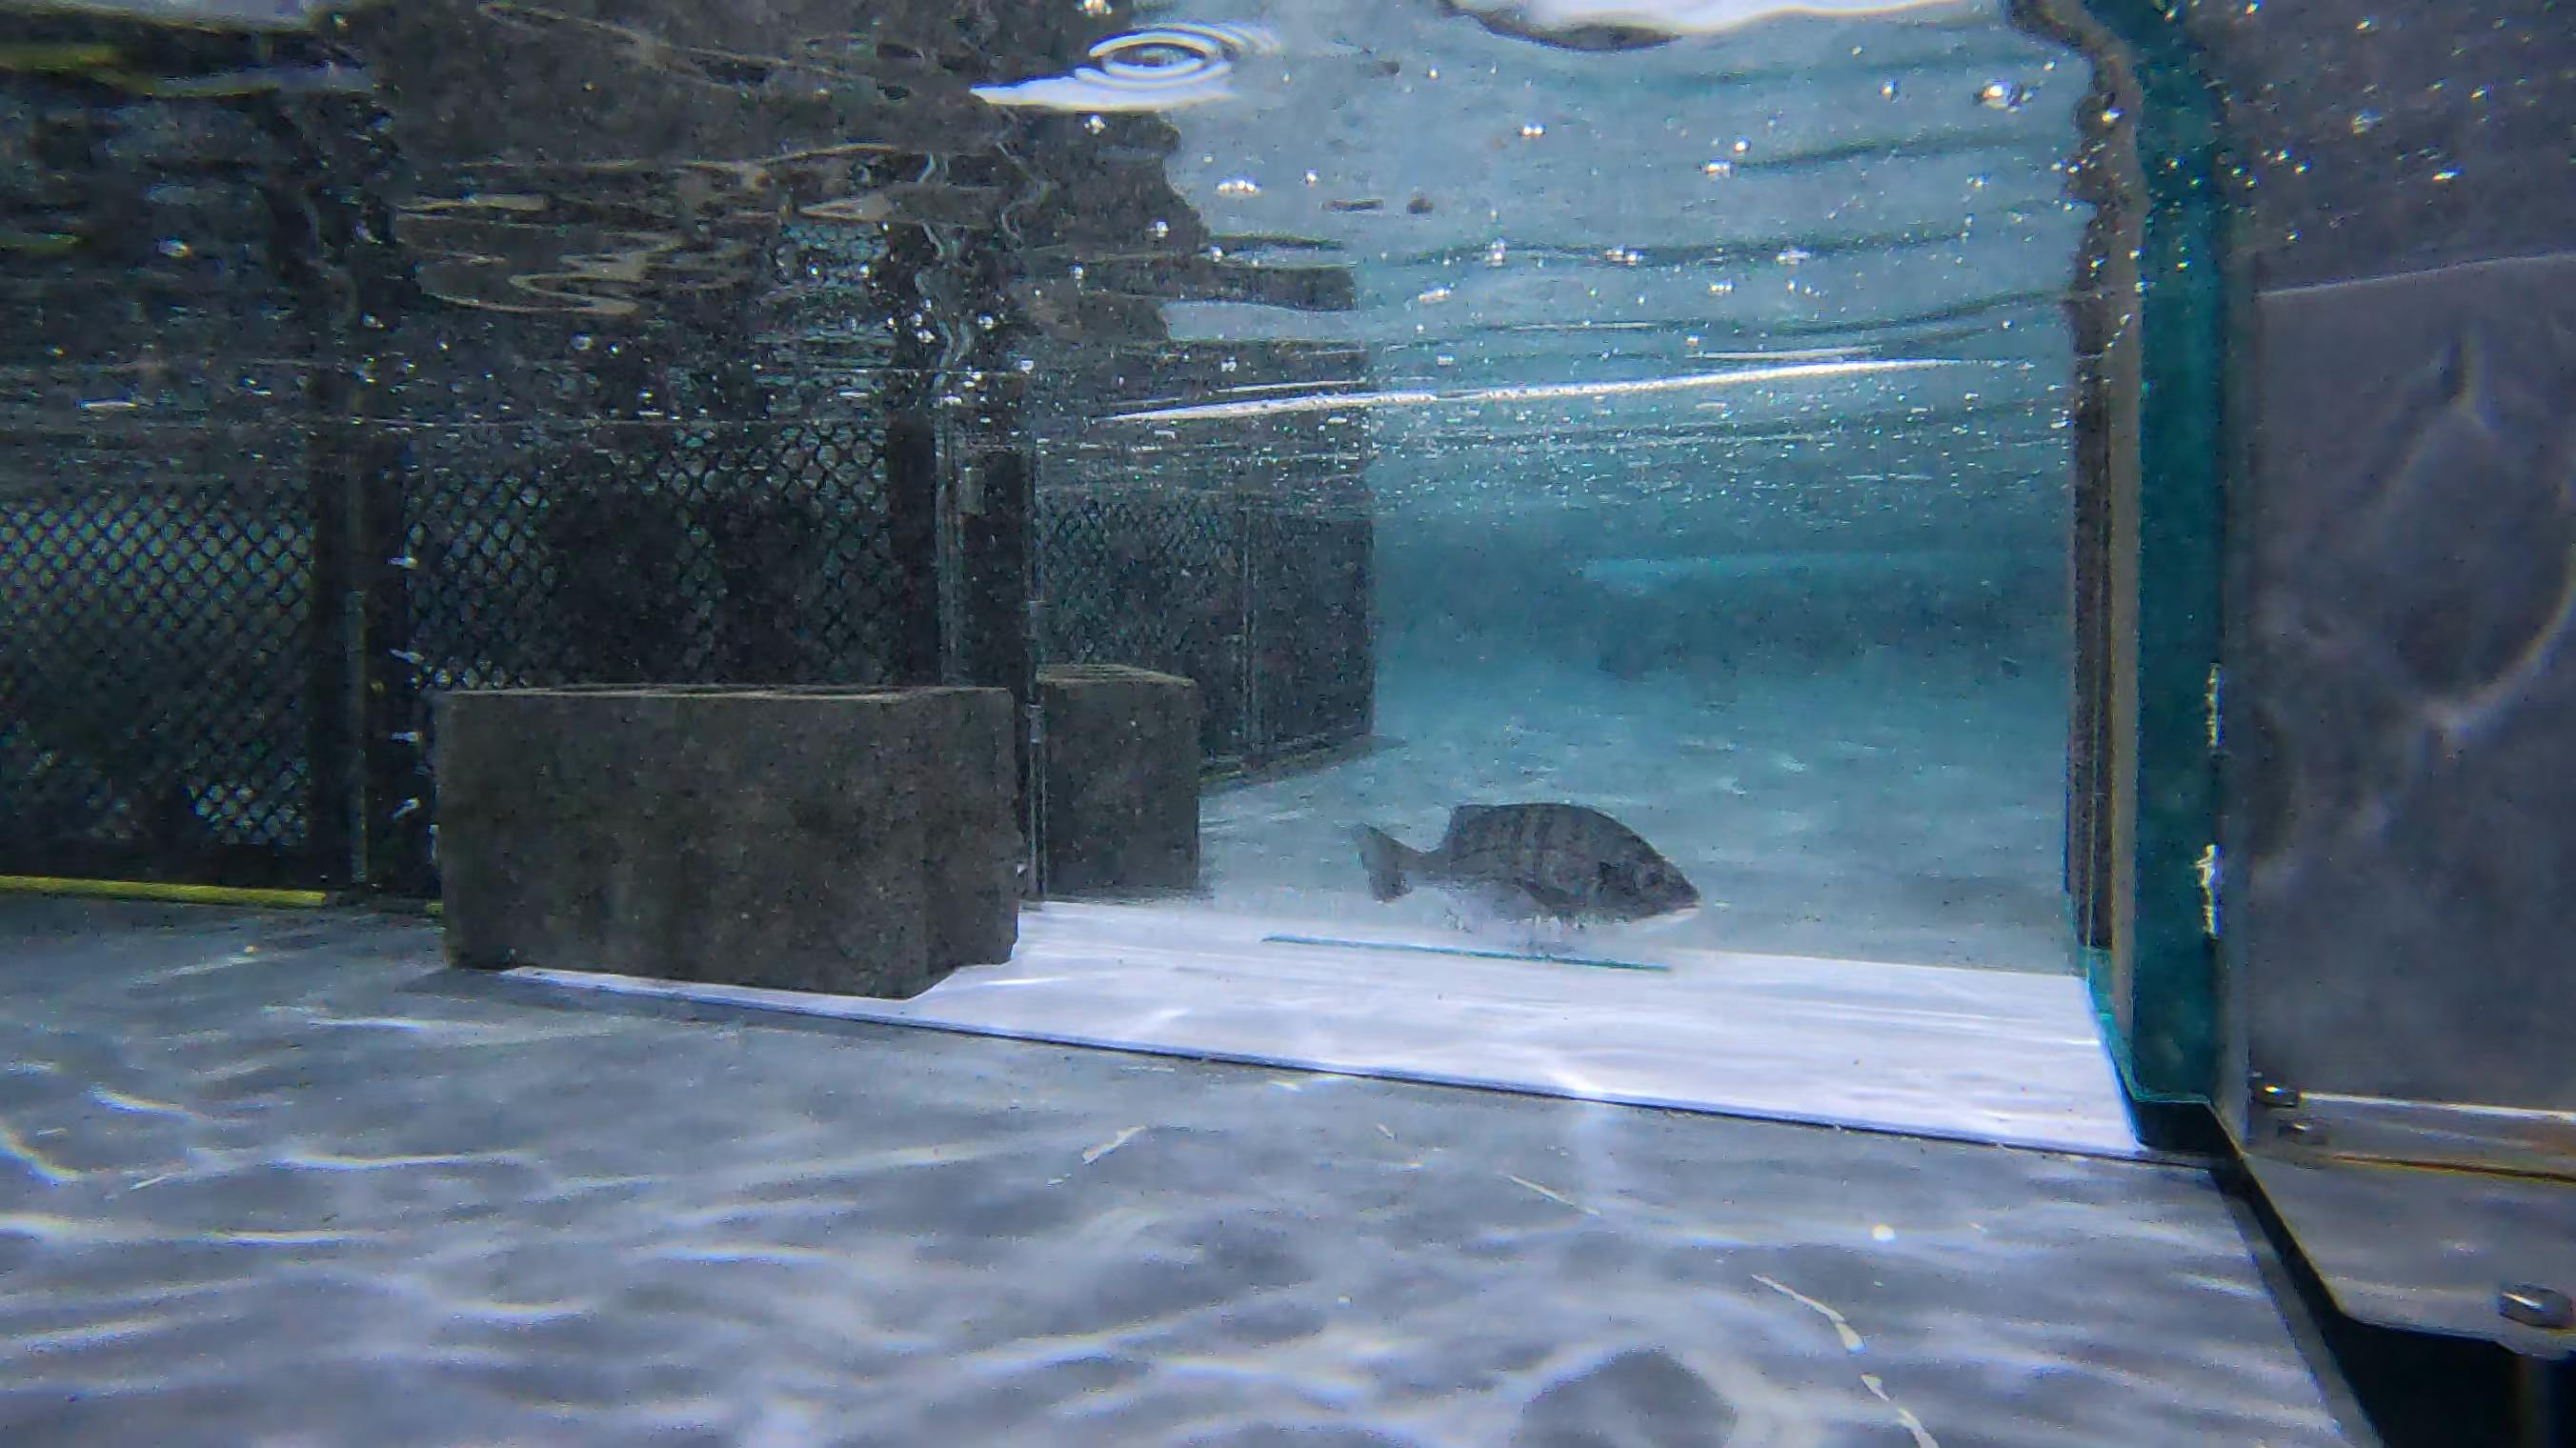

(2704, 1520)
[x,y,width,height] :  [1416, 843, 367, 132]
(367, 132)


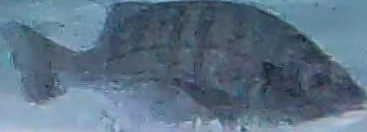

In [38]:
#"bbox": [x,y,width,height],
images_size = [] #Model 부분에서 추후 EDA할 때 사용하기 위함
save_path = dataset_path+'/'+"output/crop_image"
file_name = "72571_objt_bp_2020-12-02_08-10-42-00_001.JPG"

try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print("Error: Failed to create the directory.")

#해당파일 idx 찾기
for idx in anns.keys():
    if anns[idx]["img_file_name"] == file_name:
        index = idx
        break
try:
    tmp_img_path =image_path +'/' + file_name
    #print(tmp_img_path)
    bbox = anns[index]["bbox"]
    tmp_img = Image.open(tmp_img_path)
    tmp_img.show()
    print(tmp_img.size)
    #이미지 자르기 crop함수 이용 ex. crop((x,y,x+w,y+h))
    print("[x,y,width,height] : " ,bbox)
    croppedImage=tmp_img.crop(tuple([bbox[0],bbox[1],bbox[0]+bbox[2],bbox[1]+bbox[3]]))
    print(croppedImage.size)
    images_size.append(croppedImage.size)
    croppedImage.show()
    croppedImage.save(save_path +"/"+file_name)

except FileNotFoundError as e:
    print("Can't find Image because of sample")
    pass

##### 전체 데이터로 crop하기

###### 본인 기준 30초 정도 걸림

In [39]:
#"bbox": [x,y,width,height],
images_size = [] #Model 부분에서 추후 EDA할 때 사용하기 위함
save_path = "/opt/ml/jzone_workspace/Data_prepare"

#디렉토리 없으면 만들어 주는 코드
try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print("Error: Failed to create the directory.")


for idx in anns.keys():
    try:
        file_name = anns[idx]["img_file_name"]
        tmp_img_path =image_path +'/' + file_name
        bbox = anns[idx]["bbox"]
        tmp_img = Image.open(tmp_img_path)
        croppedImage=tmp_img.crop(tuple([bbox[0],bbox[1],bbox[0]+bbox[2],bbox[1]+bbox[3]]))
        images_size.append(croppedImage.size)
        croppedImage.save(save_path +"/"+file_name)

    except FileNotFoundError as e:
        pass